**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def numpy_dist(X, Y):
    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
    return np.sqrt(dist)

In [3]:
def mode(a, axis=0):
    scores = np.unique(np.ravel(a))
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis), axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return mostfrequent, oldcounts


In [4]:
#%%pycodestyle




class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = X.astype(float)
        self.y_train = y
    
    def predict(self, X):
        X_test = np.array(X, dtype=float)
        dists = numpy_dist(self.X_train, X)
        idx = np.argpartition(dists, self.n_neighbors, axis=0)[:self.n_neighbors]
        nearest_dists = np.take(self.y_train, idx)
        return mode(nearest_dists, axis=0)[0]
    
    def predict_proba(self, X):
        predictions_proba = np.zeros((X.shape[0], np.unique(self.y_train).shape[0]))
        for i in range(X.shape[0]):
            a = np.array(self.y_train[np.argsort(np.sum((self.X_train - X[i])**2, axis=1))])[:self.n_neighbors]
            elem, count_elem = np.unique(a, return_counts=True)
            predictions_proba[i][elem] = count_elem / np.sum(count_elem)                    
        return predictions_proba
    
    def score(self, X, y):
        y_pred = self.predict(X)
        y_len = y_pred.size * 1.
        acc = (y_len - np.count_nonzero(y_pred - y)) / y_len
        return acc

**IRIS**

In [5]:
iris = datasets.load_iris()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [7]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.35 ms, sys: 718 µs, total: 2.07 ms
Wall time: 1.53 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 25 µs, sys: 11 µs, total: 36 µs
Wall time: 33.1 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 1.01 ms, sys: 327 µs, total: 1.33 ms
Wall time: 1.13 ms


array([0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 654 µs, sys: 346 µs, total: 1e+03 µs
Wall time: 694 µs


array([[0., 1., 0., 0., 1., 1., 2., 0., 2., 2., 1., 2., 1., 0., 1.]])

In [12]:
%time clf.predict_proba(X_test)

CPU times: user 755 µs, sys: 230 µs, total: 985 µs
Wall time: 806 µs


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5]])

In [13]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.45 ms, sys: 1.81 ms, total: 6.26 ms
Wall time: 5.04 ms


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5]])

In [14]:
clf.score(X_test, y_test)

0.9333333333333333

In [15]:
my_clf.score(X_test, y_test)

0.9333333333333333

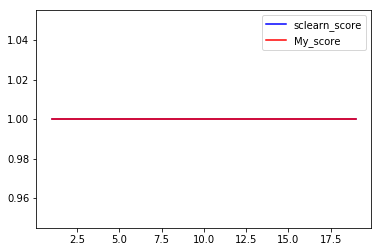

In [17]:
# Задание 3
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
n=20
k=range(1,n)
c=np.zeros(n-1)
mc=np.zeros(n-1)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    mc[i-1]=my_clf.score(X_test, y_test)
    #print mc
    c[i-1]=clf.score(X_test, y_test)
plt.plot(k, c, color='blue', label='sclearn_score')
plt.plot(k, mc, color='red', label='My_score')
plt.legend()

**MNIST**

In [27]:
mnist = fetch_mldata('MNIST original')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [29]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [30]:
%time clf.fit(X_train, y_train)

CPU times: user 30.9 s, sys: 399 ms, total: 31.3 s
Wall time: 31.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

CPU times: user 85.2 ms, sys: 120 ms, total: 206 ms
Wall time: 208 ms


In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# Библиотека визуализации статистической графики, построена на основе matplotlib.
# обеспечивает высокоуровневый интерфейс для рисования статистической графики.

# matplotlib
# Библиотека для визуализации данных, 2D и 3D графики

# train_test_split
# Метод из sklearn, позволяющий разделять датасет на тестовые и обучающие данные

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Magic method загружающий соответствующий модуль

# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Стандартизирует признаки, вычитая среднее и перенормируя так, чтобы дисперсия была единичной

# ClassifierMixin
# Класс mixin с методом score, выполняющим количественную оценку качества классификации

# NeighborsBase
# Базовый класс для KNeighborsClassifier

# KNeighborsMixin
# Миксин содержащий метод поиска k ближайших соседей (метод kneighbors)

# SupervisedIntegerMixin
# Содержит метод fit